In [1]:
import pickle
import pandas as pd
import pandas_datareader as pdr
from basic_analysis_toolkit import BasicAnalysis, get_avail_tickers
from company_toolkit import *
import datetime
from portfolio_toolkit import Portfolio
from frm_model import *

In [2]:
sp500_dataframe = pickle.load(open('stock_dataframe.pickle', 'rb'))
cd = pickle.load(open('company_dictionary.pickle', 'rb'))

analysis = BasicAnalysis(sp500_dataframe)
start = datetime.date(day=1, month=1, year=2018)
end = datetime.date(day=1, month=1, year=2019)
working_dataframe = create_frm_sensitivities_unnormalized(start, analysis, cd, cd.keys()).dropna()
tickers = working_dataframe.index

In [113]:

# getting the sector and industry columns
# make abstract function for making a series with all the companies in the list from info from company_dict
# f must be some function taht takes a ticker and returns some value 
def get_data(tickers, f):
    values = []
    for ticker in tickers:
        values.append(f(ticker))
    return pd.Series(values, index=tickers)




In [3]:
working_dataframe['Sector'] = get_data(tickers, f= lambda x: cd.get(x).info.get('Sector'))
working_dataframe['Industry'] = get_data(tickers, f = lambda x: cd.get(x).info.get('Industry'))
working_dataframe['Margin'] = get_data(tickers, f = lambda x: (pd.to_numeric(cd.get(x).income['Operating Income or Loss'], errors='coerce')/pd.to_numeric(cd.get(x).income['Total Revenue'], errors='coerce')).mean())

In [4]:
working_dataframe.groupby(by='Industry').mean().sort_values(by='Growth')

,Size,Price to Book,Momentum,Growth,Earning Variability,Financial Leverage,Volatility,Trading Activity,Margin
Industry,,,,,,,,,
Insurance - Reinsurance,1415.000000,0.421271,-0.150732,-1.374568,0.677291,0.917666,0.024527,6.107500e+05,0.107626
Auto Manufacturers,186000.000000,0.195510,-0.018780,-0.171047,0.733239,2.715233,0.023296,2.667080e+07,0.050248
Insurance - Diversified,118393.750000,0.314387,0.039329,-0.141006,1.377223,1.044522,0.021787,3.190438e+06,0.099534
Utilities - Regulated Gas,6897.333333,0.714849,-0.026667,-0.128494,1.184205,1.703514,0.026381,2.401283e+06,0.166346
Airlines,78093.800000,0.655680,0.198927,-0.046365,0.466099,-44.410151,0.059059,4.771630e+06,0.150691
Insurance - Life,17123.600000,0.181902,0.053780,-0.031497,0.339866,0.751394,0.024090,2.113260e+06,0.160943
Insurance - Property & Casualty,27630.833333,0.509533,0.059472,-0.026617,0.348075,2.061334,0.018368,1.801417e+06,0.126336
Gold,12400.000000,1.528554,0.025366,-0.020764,-9.538200,0.513331,0.019434,6.049150e+06,0.185816
Drug Manufacturers - Specialty & Generic,18125.000000,1.733293,0.035305,-0.016906,0.723328,1.554271,0.029663,2.728700e+06,0.150697


In [117]:
a = working_dataframe.groupby(by='Sector').get_group('Real Estate').groupby('Industry').mean()

In [118]:
a.sort_values(by='Margin', ascending=False)

,Size,Price to Book,Momentum,Growth,Earning Variability,Financial Leverage,Volatility,Trading Activity,Margin
Industry,,,,,,,,,
REIT - Industrial,3613.666667,2.391381,0.029024,0.066250,0.259299,0.981928,0.014057,1.470183e+06,0.447544
REIT - Retail,911.000000,1.167215,0.131341,0.043917,0.330491,2.331546,0.023567,1.623367e+06,0.398966
REIT - Residential,2234.200000,1.464674,-0.092634,0.025162,0.442788,1.225921,0.020720,9.272600e+05,0.313903
REIT - Office,1532.400000,0.903046,0.089317,0.052087,0.628125,1.645579,0.021512,1.123100e+06,0.294955
REIT - Healthcare Facilities,361.666667,1.199787,-0.070325,0.038399,0.903117,1.052027,0.023028,2.648983e+06,0.278081
REIT - Diversified,9947.400000,1.953933,-0.123429,0.122887,2.411911,1.145453,0.024064,2.612994e+07,0.219576
REIT - Hotel & Motel,184.000000,1.045658,0.009512,0.038936,0.334302,0.551108,0.011799,6.180200e+06,0.135103
Real Estate Services,90000.000000,1.349653,0.100000,0.131182,0.330358,1.532892,0.025980,1.730650e+06,0.061243


In [55]:
working_dataframe.groupby(by='Industry').get_group('REIT - Industrial')

,Size,Price to Book,Momentum,Growth,Earning Variability,Financial Leverage,Volatility,Trading Activity,Sectors,Industries,Margin,Sector,Industry
EXR,3624.0,1.901509,0.105610,0.078478,0.343134,2.055042,0.012848,1134150.0,Real Estate,REIT - Industrial,0.486395,Real Estate,REIT - Industrial
PLD,1617.0,1.383088,-0.034878,0.094762,0.282874,0.540649,0.018271,2337500.0,Real Estate,REIT - Industrial,0.320876,Real Estate,REIT - Industrial
PSA,5600.0,3.889545,0.016341,0.025509,0.151888,0.350093,0.011050,938900.0,Real Estate,REIT - Industrial,0.535363,Real Estate,REIT - Industrial


In [99]:
ticker = 'PSA'
income = cd.get(ticker).income

In [102]:
graphing_data = pd.DataFrame()
graphing_data[str(ticker) + ' Total Revenue'] = pd.to_numeric(income['Total Revenue'], errors='coerce')
graphing_data[str(ticker) + ' PLD COGS'] = pd.to_numeric(income['Cost of Revenue'], errors='coerce')
graphing_data[str(ticker) + ' PLD Total Operating Expenses'] = pd.to_numeric(income['Total Operating Expenses'], errors='coerce')

In [104]:
graphing_data.index

DatetimeIndex(['2018-12-31', '2017-12-31', '2016-12-31', '2015-12-31'], dtype='datetime64[ns]', name='Revenue', freq=None)

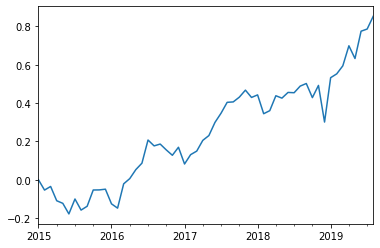

In [107]:
pld_start = datetime.date(day=1, month=1, year=2015)
pld_end = datetime.date.today()
#closes = analysis.get_close('PLD', pld_start, pld_end, 'B').plot()
#change = analysis.get_percent_change('PLD', pld_start, pld_end, 'BM').plot()
#r = analysis.get_return('PLD', pld_start, pld_end, 'BM').plot()